# Exercise 4. Neural Networks  
(with Matlab, from scratch)
- Going through this exercise, as guided by ex4.m
  
Files included for this exercise:  
- ex4.m - Octave/MATLAB script that steps you through the exercise
- ex4data1.mat - Training set of hand-written digits
- ex4weights.mat - Neural network parameters for exercise 4
- displayData.m - Function to help visualize the dataset
- fmincg.m - Function minimization routine (similar to fminunc)
- sigmoid.m - Sigmoid function
- computeNumericalGradient.m - Numerically compute gradients
- checkNNGradients.m - Function to help check your gradients
- debugInitializeWeights.m - Function for initializing weights
- predict.m - Neural network prediction function
- [x] sigmoidGradient.m - Compute the gradient of the sigmoid function
- [x] randInitializeWeights.m - Randomly initialize weights
- [x] nnCostFunction.m - Neural network cost function


### Section 1.   Neural Networks
  
In the previous exercise, you implemented _feedforward propagation_ for neu-
ral networks and used it to predict handwritten digits with the weights we
provided. In this exercise, you will implement the **_backpropagation algorithm_** to learn parameters for the NN

__Section 1.1.__ Visualizing the data

In [1]:
%plot inline
opengl hardware

In [2]:
% Setup the parameters  for this exercise

input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

On jupyternotebook, matfile is a structure file, which can be accessible using dot (.)

In [3]:
% Load Training Data 

data = load('ex4data1.mat')


data = 

  struct with fields:

    X: [5000×400 double]
    y: [5000×1 double]




In [4]:
% Define X and y from the datastructure 

X = data.X; size(X)
y = data.y; size(y)


ans =

        5000         400


ans =

        5000           1




In [6]:
% Randomly select 100 datapoints to display

m = size(X,1);
sel = randperm(m);
sel = sel(1:100);


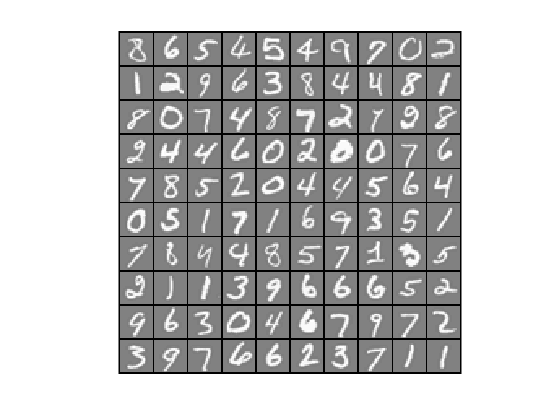

In [7]:
% Visualizing Data

displayData(X(sel,:));

__Section 1.2.__ Model Representation  
Our NN has 3 layers - an input, a hidden, and an output layer. Our inputs are pixel values of digit images. Since the images are of size 20 x 20, this gives us 400 input layer units (not counting the extra bias unit which always outputs +1).  

![NN model](./NN_model.jpg)

In [8]:
% Load saved matrices from file

datathetas = load('ex4weights.mat')



datathetas = 

  struct with fields:

    Theta1: [25×401 double]
    Theta2: [10×26 double]




In [9]:
% Assign Theta1 and Theta2
% check dimensions

Theta1 = datathetas.Theta1; size(Theta1)
Theta2 = datathetas.Theta2; size(Theta2)


ans =

    25   401


ans =

    10    26




In [12]:
% Unroll parameters into a vector called nn_params
% Implementation note: Matrix followed by semicolons - unrolls or flattens the matrix into one dimension

nn_params = [Theta1(:); Theta2(:)];

__Section 1.3.__ Feedforward and (regularized) cost function  
- finish the function, __nnCostFunction.m__ (regularized version),  **Part.1**
- use lambda = 0 (applying no regularization)

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} [-y_{k}^{(i)}log((h_\theta(x^{(i)}))_k) - (1-y_k
^{(i)})log(1-(h_\theta(x^{(i)}))_k )] $$  

with y recoded into  

$$\mathbf{y} = \left[\begin{array}
{rrr}
1 \\
0 \\
0 \\
. \\
. \\
0 \\
\end{array}\right]
, 
\left[\begin{array}
{rrr}
0 \\
1 \\
0 \\
. \\
. \\
0 \\
\end{array}\right]
, ... or
\left[\begin{array}
{rrr}
0 \\
0 \\
0 \\
. \\
. \\
1 \\
\end{array}\right]
$$

- call nnCostFunction using nnparameters (containing unrolled Theta1 and Theta2).  



In [13]:
% Weight regularization parameter (we set this to 0 here).

lambda = 0;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.287629)\n'], J);


Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)



__Section 1.4.__ Regularized cost function. 
- use lambda = 1  

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} [-y_{k}^{(i)}log((h_\theta(x^{(i)}))_k) - (1-y_k
^{(i)})log(1-(h_\theta(x^{(i)}))_k )] +$$
$$\frac{\lambda}{2m}  [ \sum_{j=1}^{25} \sum_{k=1}^{400} (\theta_{j,k}^{(1)})^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} (\theta_{j,k}^{(2)})^2  ]$$  
  
__Note__: the summation is done twice  
- rerun nnCostFunction with nnparameters(cont. Theta1 and Theta2)
  


In [14]:
% Weight regularization parameter (we set this to 1 here).

lambda = 1;

J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda);

fprintf(['Cost at parameters (loaded from ex4weights): %f '...
         '\n(this value should be about 0.383770)\n'], J);


Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)



### Section 2. Backpropagation

__Section 2.1__ Sigmoid Gradient  
Implement the sigmoid gradient function $$g'(z) = \frac{d}{dz} g(z) = g(z)(1-g(z))$$
where  
$$sigmoid(z) = g(z)= \frac{1}{1 + e^{-z}} $$


In [15]:
% Try function in sigmoidGradient.m
% When, z = 0, gradient should be exactly 0.25

sigmoidGradient(0)


ans =

    0.2500




In [7]:
g = sigmoidGradient([-1 -0.5 0 0.5 1]);
fprintf('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ');
fprintf('%f ', g);
fprintf('\n\n');

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  0.196612 0.235004 0.250000 0.235004 0.196612 




__Section 2.2.__ Random Initialization  
When training neural networks, it is important to randomly initialize the parameters for symmetry breaking. One exective strategy for random initialization is to randomly select values for $\theta^{(l)}$ uniformly in the range $[-\epsilon_{init},\epsilon_{init}]$.   
- Use $-\epsilon_{init}=0.12$.   

This range of values ensures that the parameters are kept small and makes the learning more efficient.  

Complete program in randInitializeWeights.m to initialize weights for $\theta$

Note: This step is done by editing the file, __randInitializeWeights.m__

In this part of the exercise, you will be starting to implment a two layer neural network that classifies digits. You will start by implementing a function to initialize the weights of the neural network (randInitializeWeights.m)


In [16]:
% initializing NN Parametrs

fprintf('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];


Initializing Neural Network Parameters ...



__Section 2.3.__ Backpropagation  
  
  
The intuition is as follows:  
Given a training example $(x^{(t)}; y^{(t)})$, we will first run a "forward pass" to compute all the activations throughout the network, including the output value of the hypothesis $h_{\theta}(x)$. Then, for each node $j$ in layer $l$, we would like to compute an "error term" $\delta_j^{(l)}$ that measures how much that node was "responsible" for any errors in our output.

For an output node, we can directly measure the difference between the network's activation and the true target value, and use that to define $\delta_j^{(3)}$ (since layer 3 is the output layer). For the hidden units, you will compute $\delta_j^{(l)}$ based on a weighted average of the error terms of the nodes in layer $(l + 1)$.

In detail, here is the backpropagation algorithm (also depicted in the figure). You should implement steps 1 to 4 in a loop that processes one example at a time. Concretely, you should implement a for-loop for $t = 1:m$ and place steps 1-4 below inside the for-loop, with the tth iteration performing the calculation on the tth training example $(x(t); y(t))$. Step 5 will divide the accumulated gradients by m to obtain the gradients for the neural network cost function.  
![Backpropagation updates](./Backpropagation.jpg)  


Now, implement backpropagation to the cost function, __nnCostFunction.m__ ,  **Part.2**


__Step 1__  
- Set the input layer's values $(a(1))$ to the $t-th$ training example $x(t)$. Perform a feedforward pass, computing the activations $(z(2); a(2); z(3); a(3))$ for layers 2 and 3. Note that you need to add a +1 term to ensure that the vectors of activations for layers $a(1)$ and $a(2)$ also include the bias unit.

In [ ]:
% Step 1
% n = size(X,2) +1;      % 401
% h = hidden_layer_size; % 25
% r = num_labels;        % 10

% a1 = [ones(m,1) X];    % 5000x401
% z2 = a1 * Theta1';     %<<< Step 2
% gz2 = sigmoid(z2);    
% a2 = [ones(m,1) gz2];
% z3 = a2 * Theta2';
% gz3 = sigmoid(z3);
% a3 = gz3;              % <<< size of a3 is 5000x10

__Step 2__
- For each output unit k in layer 3 (the output layer), set
$$\delta_k^{(3)} = (a_k^{((3)} - y_k)  $$
where $y_k \in  \{0,1\}$ indicates whether the current training example belongs to class k ($y_k = 1$), or if it belongs to a diferent class ($y_k = 0$).

In [ ]:
% Step 2
% d3 = a3 - y_matrix;    % <<< size is 5000x10

__Step 3__  
- For the the hidden layer l = 2, set 
$$\delta^{(2)} = (\Theta^{(2)})^T \delta^{(3)} .* g'(z^{(2)})$$




In [19]:
% Step 3
% d2 = d3 * Theta2(:,2:end) .* sigmoidGradient(z2); %<<< 5000x10 dot 10x25 = 5000x25

__Step 4__
- Accumulate the gradient from this example using the following formula.
- Note that you should skip or remove $\delta_0^{(2)}$  
$$\Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)}(a^{(l)})^T$$

In [ ]:
% Step 4  (Vectorized implementation version)
% Delta1 =  d2' * a1;                      %<<< 25x401
% Delta2 =  d3' * a2;                      %<<< 10x26

__Step 5__  
- Obtain the (unregularized) gradient for the neural network cost function by dividing the accumulated gradients by  1/m   
$$\frac{\delta}{\delta\Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)}$$


In [23]:
% Step 5
% Theta1_grad = (1/m) .* Delta1   ;
% Theta2_grad = (1/m) .* Delta2   ;

__Section 2.4 Gradient Checking__  

In your neural network, you are minimizing the cost function $J(\Theta)$. Toperform gradient checking on your parameters, you can imagine \unrolling" the parameters $\Theta(1)$; $\Theta(2)$ into a long vector $\Theta$. By doing so, you can think of the cost function being $J(\Theta)$ instead and use the following gradient checking
procedure.

In [17]:
fprintf('\nChecking Backpropagation... \n');

%  Check gradients by running checkNNGradients
checkNNGradients;


Checking Backpropagation... 
   -0.0093   -0.0093
    0.0089    0.0089
   -0.0084   -0.0084
    0.0076    0.0076
   -0.0067   -0.0067
   -0.0000   -0.0000
    0.0000    0.0000
   -0.0000   -0.0000
    0.0000    0.0000
   -0.0000   -0.0000
   -0.0002   -0.0002
    0.0002    0.0002
   -0.0003   -0.0003
    0.0003    0.0003
   -0.0004   -0.0004
   -0.0001   -0.0001
    0.0001    0.0001
   -0.0001   -0.0001
    0.0002    0.0002
   -0.0002   -0.0002
    0.3145    0.3145
    0.1111    0.1111
    0.0974    0.0974
    0.1641    0.1641
    0.0576    0.0576
    0.0505    0.0505
    0.1646    0.1646
    0.0578    0.0578
    0.0508    0.0508
    0.1583    0.1583
    0.0559    0.0559
    0.0492    0.0492
    0.1511    0.1511
    0.0537    0.0537
    0.0471    0.0471
    0.1496    0.1496
    0.0532    0.0532
    0.0466    0.0466

The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementation is correct, then 
t

__Section 2.5__  Finally, implement regularization in __nnCostFunction.m__ (__Part.3__)


To account for regularization, it turns out that you can add this as an additional term after computing the
gradients using backpropagation  

$\frac{\delta}{\delta\Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)}$ for J=0  
$\frac{\delta}{\delta\Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)}+\frac{\lambda}{m}\Theta_{ij}^{(l)} $ for J>=1




In [26]:
% Part 3, Adding regularization
% Theta1(:,1) = 0;
% Theta2(:,1) = 0;

% Theta1 = Theta1 .* (lambda / m);
% Theta2 = Theta2 .* (lambda / m);

% Theta1_grad = Theta1_grad + Theta1 ;
% Theta2_grad = Theta2_grad + Theta2 ; 

Now test the cost function, with lambda=3

In [25]:
fprintf('\nChecking Backpropagation (w/ Regularization) ... \n')

%  Check gradients by running check NNGradients
lambda = 3;
checkNNGradients(lambda);

% Also output the costFunction debugging values
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda);

fprintf(['\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' ...
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'], lambda, debug_J);



Checking Backpropagation (w/ Regularization) ... 
   -0.0093   -0.0093
    0.0089    0.0089
   -0.0084   -0.0084
    0.0076    0.0076
   -0.0067   -0.0067
   -0.0168   -0.0168
    0.0394    0.0394
    0.0593    0.0593
    0.0248    0.0248
   -0.0327   -0.0327
   -0.0602   -0.0602
   -0.0320   -0.0320
    0.0249    0.0249
    0.0598    0.0598
    0.0386    0.0386
   -0.0174   -0.0174
   -0.0576   -0.0576
   -0.0452   -0.0452
    0.0091    0.0091
    0.0546    0.0546
    0.3145    0.3145
    0.1111    0.1111
    0.0974    0.0974
    0.1187    0.1187
    0.0000    0.0000
    0.0337    0.0337
    0.2040    0.2040
    0.1171    0.1171
    0.0755    0.0755
    0.1257    0.1257
   -0.0041   -0.0041
    0.0170    0.0170
    0.1763    0.1763
    0.1131    0.1131
    0.0862    0.0862
    0.1323    0.1323
   -0.0045   -0.0045
    0.0015    0.0015

The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementatio

__Section 2.6__  Learning parameters using fmincg  


In [40]:
% =================== Part 8: Training NN ===================
%  You have now implemented all the code necessary to train a neural 
%  network. To train your neural network, we will now use "fmincg", which
%  is a function which works similarly to "fminunc". Recall that these
%  advanced optimizers are able to train our cost functions efficiently as
%  long as we provide them with the gradient computations.
%
fprintf('\nTraining Neural Network... \n')

%  After you have completed the assignment, change the MaxIter to a larger
%  value to see how more training helps.
options = optimset('MaxIter', 150);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));




Training Neural Network... 
Iteration   150 | Cost: 4.508245e-01



__Optional__  
In this part of the exercise, you will get to try out diferent learning settings for the neural network to see how the performance of the neural network varies with the regularization parameter $\lambda$ and number of training steps (the MaxIter option when using fmincg).

You will also be able to see for yourself the changes in the visualizations of the hidden units when you change the learning parameters $\lambda$ and MaxIter.

### Checking the accuracy of predictions made by the trained NN
Now we'd like to use the trained NN to predict the labels. 
Use __predict.m__ function to predict the labels of the training sets and cmpute accuracy

In [52]:
pred = predict(Theta1, Theta2, X);
fprintf('\nUsing lambda: %.f and maxIter: %.f', lambda, options.MaxIter);
fprintf('\nTraining Set Accuracy: %.1f%%\n', mean(double(pred==y)) * 100);


Using lambda: 1 and maxIter: 150
Training Set Accuracy: 97.0%



### Section 3. Visualizing Hidden Layer

One way to understand what your neural network is learning is to visualize what the representations captured by the hidden units.   
Thus, one way to visualize the \representation" captured by the hidden unit is to reshape this 400 dimensional vector into a 20x20 image anddisplay it.3 The next step of ex4.m does this by using the __displayData__ function and it will show you an image (similar to Figure 4) with 25 units, each corresponding to one hidden unit in the network.  
  

In your trained network, you should find that the _hidden units corresponds roughly to detectors that look for strokes and other patterns in the input._


Visualizing Neural Network... 



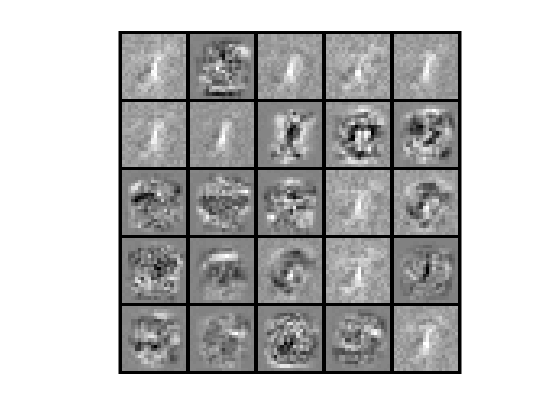

In [41]:
fprintf('\nVisualizing Neural Network... \n')
displayData(Theta1(:, 2:end));